In [1]:
import nltk
import numpy as np
nltk.download("book")
from nltk.book import *
import matplotlib.pyplot as plt

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/sjvasconcello/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/sjvasconcello/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/sjvasconcello/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/sjvasconcello/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/sjvasconcello/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/sjvasconcello/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading packa

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [4]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [6]:
print(len(text1))

260819


### Medida de riqueza lexica en un texto:
$$
R_1 = \frac{\mbox{total de palabras únicas}}{\mbox{total de palabras}} = \frac{\mbox{longitud del vocabulario}}{\mbox{longitud del texto}}
$$


In [11]:
vocabulario = sorted(set(text1))
print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [12]:
rl = len(vocabulario) / len(text1)
print(rl)

0.07406285585022564


In [13]:
def riqueza_lexica(texto):
    vocabulario = sorted(set(texto))
    return len(vocabulario) / len(texto)

In [14]:
riqueza_lexica(text1)

0.07406285585022564

In [15]:
riqueza_lexica(text2)

0.04826383002768831

In [16]:
def porcentaje_palabra(palabra, texto):
    return 100 * texto.count(palabra) / len(texto)

In [17]:
porcentaje_palabra("monster", text1)

0.018786974875296663

### Estadistica del Lenguaje

In [18]:
dic = {}
#for palabra in set(text1):
#    dic[palabra] = text1.count(palabra)
#dic

KeyboardInterrupt: 

MetodoFreqDist de NLTK

In [22]:
fdist = FreqDist(text1)
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

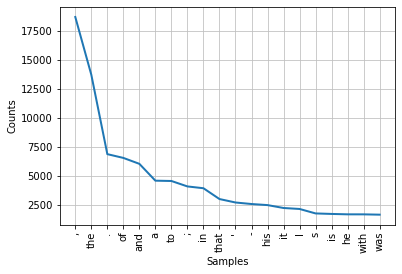

In [23]:
fdist.plot(20)

In [25]:
fdist["monster"]

49

### Distribuciones sobre contenido con filtro-fino

In [28]:
long_words = [palabra for palabra in text1 if len(palabra) > 5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

In [32]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if ((len(palabra)>5) and (fdist[palabra]>10))]
dtypes = [("word","S10"),("frequency",int)]
palabras_interesantes = np.array(palabras_interesantes, dtype= dtypes)
palabras_interesantes

array([(b'friends',  16), (b'immediatel',  14), (b'hoisting',  11),
       (b'striking',  23), (b'practical',  13), (b'resting',  12),
       (b'falling',  12), (b'beheld',  21), (b'rolled',  43),
       (b'hearted',  12), (b'mounted',  13), (b'volume',  13),
       (b'longer',  18), (b'seemed', 283), (b'itself',  84),
       (b'painted',  12), (b'yonder',  16), (b'Besides',  30),
       (b'various',  36), (b'tongue',  11), (b'curious',  53),
       (b'example',  18), (b'whereas',  14), (b'smaller',  11),
       (b'Though',  49), (b'thrown',  25), (b'myself',  68),
       (b'waters',  69), (b'battle',  29), (b'upright',  12),
       (b'thousands',  16), (b'sudden',  42), (b'freely',  11),
       (b'natural',  31), (b'straits',  11), (b'repeated',  20),
       (b'nailed',  11), (b'heaved',  12), (b'watery',  24),
       (b'cutting',  35), (b'exceeding',  12), (b'neverthele',  23),
       (b'advance',  21), (b'ginger',  11), (b'evinced',  21),
       (b'should', 181), (b'Manxman',  12), 

In [34]:
palabras_interesantes = np.sort(palabras_interesantes, order = "frequency")
palabras_interesantes

array([(b'America',  11), (b'Father',  11), (b'Fleece',  11),
       (b'Guernsey',  11), (b'Heaven',  11), (b'NANTUCKET',  11),
       (b'Perseus',  11), (b'Ramadan',  11), (b'Therefore',  11),
       (b'additional',  11), (b'advanced',  11), (b'appearance',  11),
       (b'baleen',  11), (b'barbaric',  11), (b'beating',  11),
       (b'begins',  11), (b'beholding',  11), (b'belong',  11),
       (b'blackness',  11), (b'blanket',  11), (b'blessed',  11),
       (b'butter',  11), (b'central',  11), (b'clothes',  11),
       (b'coiled',  11), (b'commotion',  11), (b'concluding',  11),
       (b'contact',  11), (b'convenient',  11), (b'covered',  11),
       (b'cursed',  11), (b'demanded',  11), (b'desired',  11),
       (b'direct',  11), (b'element',  11), (b'elevated',  11),
       (b'elsewhere',  11), (b'excellent',  11), (b'experience',  11),
       (b'fashion',  11), (b'fashioned',  11), (b'fastened',  11),
       (b'features',  11), (b'fellows',  11), (b'fierce',  11),
       (b'fif

In [ ]:
top_words = 20
x = np.array(len(palabras_interesantes[-topwords:]))
y = [freq[1] for freq in palabras_interesantes[-topwords:]]
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.xticks(x, [str(freq[0]) for freq in palabras_interesantes])
plt.grid(True)
plt.show()